### Deliverable 1: Preprocessing the Data for a Neural Network

In [177]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("/Users/pbunyasr/Desktop/GWU_Data/Module_19/Neural_Network_Charity_Analysis/Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [178]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)

In [179]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [180]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

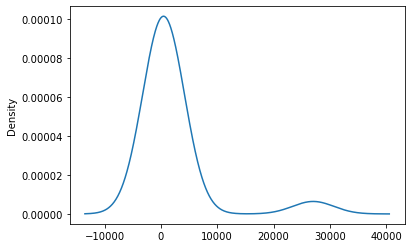

In [181]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [182]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type_counts[application_type_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [183]:
# Look at CLASSIFICATION value counts for binning
classification_value_counts = application_df['CLASSIFICATION'].value_counts()
classification_value_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

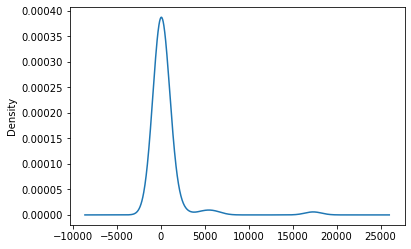

In [184]:
# Visualize the value counts of CLASSIFICATION
classification_value_counts.plot.density()

In [185]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_value_counts[classification_value_counts < 500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [186]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [187]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/Users/pbunyasr/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [188]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True,right_index=True)
application_df = application_df.drop(columns = application_cat)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [189]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(['IS_SUCCESSFUL'],1).values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

/var/folders/r4/cznc9m5j1lg_cdlshwtv0r3h0000gp/T/ipykernel_3401/4287254056.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = application_df.drop(['IS_SUCCESSFUL'],1).values


In [190]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [191]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 80)                3600      
                                                                 
 dense_28 (Dense)            (None, 30)                2430      
                                                                 
 dense_29 (Dense)            (None, 1)                 31        
                                                                 
Total params: 6,061
Trainable params: 6,061
Non-trainable params: 0
_________________________________________________________________


In [192]:


import os
from tensorflow.keras.callbacks import ModelCheckpoint

os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"



                                                              

In [193]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [194]:
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)    

In [195]:
# Train the model
fit_model = nn.fit(X_train, y_train,epochs=30, callbacks=[cp_callback])

Epoch 1/30
  1/804 [..............................] - ETA: 5:07 - loss: 37501.3984 - accuracy: 0.5312
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 11/804 [..............................] - ETA: 4s - loss: 8623.0479 - accuracy: 0.4688   
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 20/804 [..............................] - ETA: 4s - loss: 7127.2959 - accuracy: 0.4938
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 30/804 [>.............................] - ETA: 4s - loss: 5354.0972 - accuracy: 0.4802
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 40/804 [>.............................] - ETA: 4s - loss: 4193.7085 - accuracy: 0.4906
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 51/804 

420/804 [==============>...............] - ETA: 2s - loss: 22122.1934 - accuracy: 0.4936
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
431/804 [===============>..............] - ETA: 1s - loss: 21610.0332 - accuracy: 0.4939
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 21034.3867 - accuracy: 0.4931
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 20547.3203 - accuracy: 0.4931
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
469/804 [================>.............] - ETA: 1s - loss: 20026.4512 - accuracy: 0.4931
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving mod

 70/804 [=>............................] - ETA: 3s - loss: 38861.5391 - accuracy: 0.5353
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
 81/804 [==>...........................] - ETA: 3s - loss: 36194.0039 - accuracy: 0.5336
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
 96/804 [==>...........................] - ETA: 3s - loss: 52223.6836 - accuracy: 0.5319
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
111/804 [===>..........................] - ETA: 3s - loss: 45383.7031 - accuracy: 0.5270
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5


539/804 [===================>..........] - ETA: 1s - loss: 68261.4453 - accuracy: 0.5005
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 67216.4531 - accuracy: 0.5002
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
565/804 [====================>.........] - ETA: 1s - loss: 65580.1016 - accuracy: 0.4994
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
576/804 [====================>.........] - ETA: 1s - loss: 64342.2969 - accuracy: 0.5005
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
591/804 [=====================>........] - ETA: 0s - l

182/804 [=====>........................] - ETA: 2s - loss: 7681.2432 - accuracy: 0.5199
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 7555.2041 - accuracy: 0.5215
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
207/804 [======>.......................] - ETA: 2s - loss: 7564.7295 - accuracy: 0.5216
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
222/804 [=======>......................] - ETA: 2s - loss: 7255.6299 - accuracy: 0.5215
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
237/804 [=======>......................] - ETA: 2s - loss:

640/804 [======================>.......] - ETA: 0s - loss: 58082.4141 - accuracy: 0.5158
Epoch 3: saving model to checkpoints/weights.03.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 57940.0078 - accuracy: 0.5158
Epoch 3: saving model to checkpoints/weights.03.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 58200.7227 - accuracy: 0.5162
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 61065.0039 - accuracy: 0.5159
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 60611.9062 - accuracy: 0.5152
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 59650.7148 - ac


Epoch 4: saving model to checkpoints/weights.04.hdf5
277/804 [=========>....................] - ETA: 2s - loss: 34514.4570 - accuracy: 0.4982
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
288/804 [=========>....................] - ETA: 2s - loss: 33779.6094 - accuracy: 0.4990
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
298/804 [==========>...................] - ETA: 2s - loss: 32761.0469 - accuracy: 0.5012
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
312/804 [==========>...................] - ETA: 2s - loss: 32095.1758 - accuracy: 0.5008
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
323/804 [===========>..................] - ETA: 2s - l


Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 41352.1328 - accuracy: 0.4947
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 40553.4219 - accuracy: 0.4951
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
778/804 [============================>.] - ETA: 0s - loss: 39783.4766 - accuracy: 0.4951
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
790/804 [============================>.] - ETA: 0s - loss: 39179.2422 - accuracy: 0.4960
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5


399/804 [=============>................] - ETA: 1s - loss: 15119.7705 - accuracy: 0.5222
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 15307.3164 - accuracy: 0.5208
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
424/804 [==============>...............] - ETA: 1s - loss: 15246.9609 - accuracy: 0.5210
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 23757.4648 - accuracy: 0.5212
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
454/804 [===============>..............] - ETA: 1s - l


Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
 65/804 [=>............................] - ETA: 3s - loss: 402.4097 - accuracy: 0.6173
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
 78/804 [=>............................] - ETA: 3s - loss: 1108.9062 - accuracy: 0.5933
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
 90/804 [==>...........................] - ETA: 3s - loss: 997.7828 - accuracy: 0.5802 
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
105/804 [==>...........................] - ETA: 3s - loss: 991.4517 - accuracy: 0.5652
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch

520/804 [==================>...........] - ETA: 1s - loss: 10987.1201 - accuracy: 0.5172
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
534/804 [==================>...........] - ETA: 1s - loss: 10733.1895 - accuracy: 0.5175
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
545/804 [===================>..........] - ETA: 1s - loss: 10540.5684 - accuracy: 0.5181
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
560/804 [===================>..........] - ETA: 1s - loss: 10364.3965 - accuracy: 0.5179
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
572/804 [====================>.........] - ETA: 1s - loss: 10155.0898 - accuracy: 0.5183
Epoch 6: saving mod


Epoch 7: saving model to checkpoints/weights.07.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 5784.3306 - accuracy: 0.4895
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 5381.4663 - accuracy: 0.4898
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 5074.8018 - accuracy: 0.4893
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 5425.9336 - accuracy: 0.4895
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
236/

642/804 [======================>.......] - ETA: 0s - loss: 13324.4609 - accuracy: 0.5091
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 13054.1689 - accuracy: 0.5065
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 12770.1211 - accuracy: 0.5054
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 12497.6924 - accuracy: 0.5048
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
697/804 [=========================>....] - ETA: 0s - l


Epoch 8: saving model to checkpoints/weights.08.hdf5
302/804 [==========>...................] - ETA: 2s - loss: 9634.1650 - accuracy: 0.4973
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
317/804 [==========>...................] - ETA: 2s - loss: 9464.2100 - accuracy: 0.4969
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
330/804 [===========>..................] - ETA: 2s - loss: 9745.9932 - accuracy: 0.4950
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
342/804 [===========>..................] - ETA: 2s - loss: 9542.3193 - accuracy: 0.4946
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
355/804 [============>.................] - ETA: 1s - loss:

757/804 [===========================>..] - ETA: 0s - loss: 9153.9736 - accuracy: 0.4981
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 9155.5361 - accuracy: 0.4988
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
782/804 [============================>.] - ETA: 0s - loss: 9398.5996 - accuracy: 0.4986
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
796/804 [============================>.] - ETA: 0s - loss: 9731.8330 - accuracy: 0.4992
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
804/804 [==============================] - 4s 4ms/step - loss: 10008.6826 - accuracy: 0.4998
Epoch 9/30
  1/804 [..............................] - ETA: 2s - loss: 112


Epoch 9: saving model to checkpoints/weights.09.hdf5
409/804 [==============>...............] - ETA: 1s - loss: 24726.3555 - accuracy: 0.5228
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 23919.6621 - accuracy: 0.5219
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 23368.8730 - accuracy: 0.5213
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 22623.0156 - accuracy: 0.5192
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5


 54/804 [=>............................] - ETA: 3s - loss: 20534.1758 - accuracy: 0.5081
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
 64/804 [=>............................] - ETA: 3s - loss: 17872.6953 - accuracy: 0.5156
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
 79/804 [=>............................] - ETA: 3s - loss: 27800.3320 - accuracy: 0.5214
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
 93/804 [==>...........................] - ETA: 3s - loss: 24018.8848 - accuracy: 0.5259
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
104/804 [==>...........................] - ETA: 3s - loss: 22870.0352 - accuracy: 0.5285
Epoch 10:


Epoch 10: saving model to checkpoints/weights.10.hdf5
509/804 [=================>............] - ETA: 1s - loss: 10356.3027 - accuracy: 0.5222
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 10067.8428 - accuracy: 0.5206
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
538/804 [===================>..........] - ETA: 1s - loss: 9820.6182 - accuracy: 0.5189 
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
549/804 [===================>..........] - ETA: 1s - loss: 9631.5879 - accuracy: 0.5178
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
561/804 [===================>..........] - E


Epoch 11: saving model to checkpoints/weights.11.hdf5
150/804 [====>.........................] - ETA: 3s - loss: 752.7244 - accuracy: 0.4956
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
165/804 [=====>........................] - ETA: 3s - loss: 686.9225 - accuracy: 0.4975
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 654.2996 - accuracy: 0.4977
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 611.8677 - accuracy: 0.5023
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.h

600/804 [=====================>........] - ETA: 0s - loss: 2488.1802 - accuracy: 0.4974
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 2438.5325 - accuracy: 0.4973
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 2397.8503 - accuracy: 0.4956
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 2477.4761 - accuracy: 0.4948
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 2437.7612 - accuracy: 0.4955
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: savi

237/804 [=======>......................] - ETA: 2s - loss: 427.4309 - accuracy: 0.5107
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
251/804 [========>.....................] - ETA: 2s - loss: 420.4963 - accuracy: 0.5093
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
266/804 [========>.....................] - ETA: 2s - loss: 1193.2234 - accuracy: 0.5049
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
281/804 [=========>....................] - ETA: 2s - loss: 1217.7542 - accuracy: 0.5059
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
294/804 [=========>....................] - ETA: 2

691/804 [========================>.....] - ETA: 0s - loss: 2118.8013 - accuracy: 0.5154
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 2094.0232 - accuracy: 0.5141
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 2059.9316 - accuracy: 0.5132
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 2020.2539 - accuracy: 0.5123
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 1993.2373 - accuracy: 0.5120
Epoch 12: savi

322/804 [===========>..................] - ETA: 2s - loss: 2570.0186 - accuracy: 0.4876
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
332/804 [===========>..................] - ETA: 2s - loss: 2496.7109 - accuracy: 0.4869
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
343/804 [===========>..................] - ETA: 2s - loss: 2423.3335 - accuracy: 0.4867
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
355/804 [============>.................] - ETA: 2s - loss: 2766.1809 - accuracy: 0.4875
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
367/804 [============>.................] - ETA: 2s - loss: 2699.0781 - accuracy: 0.4864
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: savi

777/804 [===========================>..] - ETA: 0s - loss: 2310.4871 - accuracy: 0.4876
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
792/804 [============================>.] - ETA: 0s - loss: 2267.4717 - accuracy: 0.4886
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 2234.4585 - accuracy: 0.4890
Epoch 14/30
  1/804 [..............................] - ETA: 2s - loss: 12.9540 - accuracy: 0.5000
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
 12/804 [..............................] - ETA: 3s - loss: 77.5380 - accuracy: 0.5911
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
 2

428/804 [==============>...............] - ETA: 1s - loss: 440.8799 - accuracy: 0.5255
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 431.1880 - accuracy: 0.5253
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 421.1630 - accuracy: 0.5253
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
461/804 [================>.............] - ETA: 1s - loss: 415.7311 - accuracy: 0.5242
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
473/804 [================>.............] - ETA: 1s - loss: 406.1623 - accuracy: 0.5245
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving mo

 87/804 [==>...........................] - ETA: 3s - loss: 1332.9825 - accuracy: 0.5183
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
 99/804 [==>...........................] - ETA: 3s - loss: 1225.6343 - accuracy: 0.5193
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
114/804 [===>..........................] - ETA: 3s - loss: 1480.9371 - accuracy: 0.5167
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
125/804 [===>..........................] - ETA: 2s - loss: 1359.4305 - accuracy: 0.5140
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
134/804 [====>.........................] - ETA: 3s - loss: 1270.2592 - accuracy: 0.5138
Epoch 15: savi


Epoch 15: saving model to checkpoints/weights.15.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 615.2112 - accuracy: 0.5038
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 602.9647 - accuracy: 0.5047
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 589.2587 - accuracy: 0.5052
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 579.9714 - accuracy: 0.5062
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
587/804 [====================>.........] - ETA: 1s - loss: 567.5451 - accuracy: 0.5063
Epoch 15: saving mo

170/804 [=====>........................] - ETA: 3s - loss: 42.9218 - accuracy: 0.4982
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
184/804 [=====>........................] - ETA: 3s - loss: 39.8032 - accuracy: 0.5020
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
195/804 [======>.......................] - ETA: 3s - loss: 37.6070 - accuracy: 0.5048
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 35.1577 - accuracy: 0.5055
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
220/804 [=======>......................] - ETA: 2s - loss: 34.0364 - accuracy: 0.5061
Epoch 16: saving model t

629/804 [======================>.......] - ETA: 0s - loss: 22.6542 - accuracy: 0.5229
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 22.2766 - accuracy: 0.5238
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 21.7824 - accuracy: 0.5244
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 21.3412 - accuracy: 0.5247
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
680/804 [========================>.....] - ETA: 0s - lo


Epoch 17: saving model to checkpoints/weights.17.hdf5
286/804 [=========>....................] - ETA: 2s - loss: 0.6934 - accuracy: 0.5359
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
301/804 [==========>...................] - ETA: 2s - loss: 0.6936 - accuracy: 0.5346
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
315/804 [==========>...................] - ETA: 2s - loss: 0.6935 - accuracy: 0.5346
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
326/804 [===========>..................] - ETA: 2s - loss: 0.6937 - accuracy: 0.5336
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
341/


Epoch 17: saving model to checkpoints/weights.17.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6927 - accuracy: 0.5315
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.6927 - accuracy: 0.5313
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6927 - accuracy: 0.5315
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6927 - accuracy: 0.5316
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
786/804 [============================>.] - ETA: 0s - loss: 


Epoch 18: saving model to checkpoints/weights.18.hdf5
376/804 [=============>................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5366
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
387/804 [=============>................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5362
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
397/804 [=============>................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5364
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 0.6906 - accuracy: 0.5362
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
417/804 [==============>...............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5354
Epoch 18: saving model to che

  1/804 [..............................] - ETA: 3s - loss: 0.6871 - accuracy: 0.5625
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
 10/804 [..............................] - ETA: 4s - loss: 0.6940 - accuracy: 0.5094
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
 22/804 [..............................] - ETA: 3s - loss: 0.6930 - accuracy: 0.5170
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
 32/804 [>.............................] - ETA: 3s - loss: 0.6942 - accuracy: 0.5068
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
 43/804 [>.............................] - ETA: 3s - loss: 0.6928 - accuracy: 0.5189
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to che


Epoch 19: saving model to checkpoints/weights.19.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5283
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5277
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
460/804 [================>.............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5289
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
472/804 [================>.............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5298
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
483/804 [=================>............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5296
Epoch 19: saving model to che


Epoch 20: saving model to checkpoints/weights.20.hdf5
 69/804 [=>............................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5340
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
 79/804 [=>............................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5340
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
 89/804 [==>...........................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5337
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
 99/804 [==>...........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5319
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
110/804 [===>..........................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5301
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to che

530/804 [==================>...........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5363
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
544/804 [===================>..........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5365
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5367
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
566/804 [====================>.........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5359
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5352
Epoch 20: saving model to che


Epoch 21: saving model to checkpoints/weights.21.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5304
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
210/804 [======>.......................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5275
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5274
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5286
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epo


Epoch 21: saving model to checkpoints/weights.21.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5313
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epo


Epoch 22: saving model to checkpoints/weights.22.hdf5
281/804 [=========>....................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5336
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
291/804 [=========>....................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5324
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
302/804 [==========>...................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5335
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
311/804 [==========>...................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5336
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
322/804 [===========>..................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5330
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to che

711/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 22: saving model to che

350/804 [============>.................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5286
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
359/804 [============>.................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5279
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
367/804 [============>.................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5280
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
377/804 [=============>................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5273
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
387/804 [=============>................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5274
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
400/804 [=============>.......

804/804 [==============================] - 4s 5ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 24/30
  1/804 [..............................] - ETA: 2s - loss: 0.6786 - accuracy: 0.6250
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.6884 - accuracy: 0.5521
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
 23/804 [..............................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5408
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
 33/804 [>.............................] - ETA: 4s - loss: 0.6895 - accuracy: 0.5445
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
 43/804 [>.............................] - ETA: 4s - loss: 0.6902 - 

451/804 [===============>..............] - ETA: 1s - loss: 0.6904 - accuracy: 0.5373
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
463/804 [================>.............] - ETA: 1s - loss: 0.6905 - accuracy: 0.5367
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
475/804 [================>.............] - ETA: 1s - loss: 0.6905 - accuracy: 0.5371
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
483/804 [=================>............] - ETA: 1s - loss: 0.6904 - accuracy: 0.5376
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.6904 - accuracy: 0.5374
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to che


Epoch 25: saving model to checkpoints/weights.25.hdf5
 64/804 [=>............................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5234
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
 83/804 [==>...........................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5222
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
 93/804 [==>...........................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5225
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
109/804 [===>..........................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5232
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epo


Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5342
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
602/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
619/804 [======================>.


Epoch 26: saving model to checkpoints/weights.26.hdf5
235/804 [=======>......................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5366
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
245/804 [========>.....................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5364
Epoch 26: saving model to checkpoints/weights.26.hdf5
253/804 [========>.....................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5361
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
263/804 [========>.....................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5374
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
277/804 [=========>....................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5360
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to che


Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epo

353/804 [============>.................] - ETA: 2s - loss: 0.6896 - accuracy: 0.5424
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
361/804 [============>.................] - ETA: 2s - loss: 0.6896 - accuracy: 0.5426
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
371/804 [============>.................] - ETA: 2s - loss: 0.6898 - accuracy: 0.5417
Epoch 27: saving model to checkpoints/weights.27.hdf5
379/804 [=============>................] - ETA: 2s - loss: 0.6897 - accuracy: 0.5423
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
386/804 [=============>................] - ETA: 2s - loss: 0.6898 - accuracy: 0.5412
Epoch 27: saving model to checkpoints/weights.27.hdf5
391/804 [=============>................] - ETA: 2s - loss: 0.6898 - accuracy: 0.5412
Epoch 27: saving model to checkpoints/weights.27.hdf5




Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
 12/804 [..............................] - ETA: 4s - loss: 0.6980 - accuracy: 0.4635
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
 22/804 [..............................] - ETA: 3s - loss: 0.6931 - accuracy: 0.5156
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
 33/804 [>.............................] - ETA: 3s - loss: 0.6925 - accuracy: 0.5218
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
 47/804 [>.............................] - ETA: 3s - loss: 0.6925 - accuracy: 0.5206
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
 62/

497/804 [=================>............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5279
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
515/804 [==================>...........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5292
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
531/804 [==================>...........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5292
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5291
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
558/


Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
173/804 [=====>........................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5356
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
191/804 [======>.......................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5330
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
207/804 [======>.......................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5349
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5355
Epo

658/804 [=======================>......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5348
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5352
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5350
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
718/

334/804 [===========>..................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5327
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
349/804 [============>.................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
364/804 [============>.................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5321
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
379/804 [=============>................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
394/

789/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 30: saving model to checkpoints/weights.30.hdf5
804/804 [==============================] - 4s 4ms/step - loss: 0.6912 - accuracy: 0.5321


In [196]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7176 - accuracy: 0.6255 - 336ms/epoch - 1ms/step
Loss: 0.7175524234771729, Accuracy: 0.6255393624305725


In [197]:
nn.save("AlphabetSoupCharity.h5")